<a href="https://colab.research.google.com/github/ronak7613/influenza_outbreak_prediction_via_twitter_data/blob/main/Influenza_Outbreak_Event_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#project decription
---
Data Set Information:

The data is from the United States. The data comes from different states under different weeks. For each week, the task is to predict whether or not there is an influenza outbreak on the next date. More specifically, for influenza activity, there are four levels of flu activities from minimal to high according to CDC Flu Activity Map. An influenza outbreak occurrence is indicated if the activity level is high.

The input of the prediction task is the set of the keyword counts for all the tweets in a state in a week. The output is the occurrence of influenza outbreak for the specific state in the next week, which is zero if no event in the next week; or one, otherwise. Here are the briefs of all the variables:

'flu_locations': a list of states.
'flu_keywords': keyword list.
'flu_X_*': input data for all the locations and all the weeks.
'flu_Y_*': output data for all the locations and all the weeks.

#import libraries

In [ ]:
from scipy.io import loadmat
import scipy.sparse
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

#functions

In [ ]:
data = loadmat('/content/drive/MyDrive/ml ronak/ml project/influenza_outbreak_dataset.mat')
def conver(attribute):
  b=[]
  for i in data[attribute]:
    for j in range(len(i)):
      b.append(i[j][0])

  return b

In [ ]:
keywords=conver('flu_keywords')
states=conver('flu_locs')

In [ ]:
keywords

['flu',
 'swine',
 'stomach',
 'symptoms',
 'virus',
 'bug',
 'strep',
 'season',
 'influenza',
 'fever',
 'thera',
 'poisoning',
 'pneumonia',
 'bird',
 'infection',
 'epidemic',
 'week',
 'bronchitis',
 'sucks',
 'immune',
 'soon',
 'colds',
 'caught',
 'medicine',
 'soup',
 'weekend',
 'dying',
 'recovering',
 'weeks',
 'meds',
 'sick',
 'outbreak',
 'cough',
 'sickness',
 'strain',
 'jab',
 'kicking',
 'catch',
 'catching',
 'bed',
 'contagious',
 'days',
 'aches',
 'yesterday',
 'battling',
 'cure',
 'coming',
 'doctor',
 'rest',
 'worst',
 'tomorrow',
 'case',
 'illness',
 'hours',
 'due',
 'worse',
 'system',
 'ini',
 'weight',
 'sinus',
 'body',
 'germs',
 'morning',
 'hangover',
 'death',
 'awful',
 'hospital',
 'fighting',
 '12s',
 'away',
 'feeling',
 'sakit',
 'horrible',
 'miserable',
 'since',
 'ebola',
 'lagi',
 'die',
 'chills',
 'finals',
 'vaccination',
 'pounds',
 'weather',
 'nasty',
 'played',
 'hour',
 'healthy',
 'sicker',
 'winter',
 'finally',
 'plague',
 'spre

In [ ]:
states

['wyoming',
 'colorado',
 'nebraska',
 'washington',
 'rhode island',
 'tennessee',
 'wisconsin',
 'nevada',
 'maine',
 'north dakota',
 'mississippi',
 'new jersey',
 'oklahoma',
 'delaware',
 'minnesota',
 'north carolina',
 'illinois',
 'new york',
 'arkansas',
 'indiana',
 'maryland',
 'louisiana',
 'idaho',
 'arizona',
 'iowa',
 'west virginia',
 'michigan',
 'kansas',
 'utah',
 'virginia',
 'oregon',
 'connecticut',
 'california',
 'massachusetts',
 'alaska',
 'vermont',
 'georgia',
 'pennsylvania',
 'florida',
 'hawaii',
 'district of columbia',
 'new hampshire',
 'texas',
 'missouri',
 'south carolina',
 'ohio',
 'alabama',
 'new mexico']

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'flu_X_tr', 'flu_Y_tr', 'flu_X_te', 'flu_Y_te', 'flu_locs', 'flu_keywords'])

#skip this tab
---
start from training data

In [ ]:
#less accurate approach

# x=data['flu_X_tr']
# y=data['flu_Y_tr']

# j=np.vstack((x, y))

# j.shape
# d=pd.DataFrame(j,columns=states)
# d

#training data
---
x_training:rows: 1095 * 48 = 52560  
x_training:col : 545  
y_training:rows : 1095 * 48 =52560    
y_training:col : 1


In [ ]:
x_tr=[]
for i in range(48):
  x_tr.append(data['flu_X_tr'][0][i].todense())

x_tr=np.array(x_tr)

x_tr = x_tr.reshape(x_tr.shape[0]*x_tr.shape[1],x_tr.shape[2])
x_tr=pd.DataFrame(x_tr)
x_tr.shape

y_tr=[]

for i in range(48) :
  #.append(data['flu_Y_tr'][0][i].todense())
  y_tr.append(data['flu_Y_tr'][0][i])

y_tr=np.array(y_tr)
y_tr = y_tr.reshape(-1,1)
y_tr=pd.DataFrame(y_tr)
x_tr.shape

print("X_tr -"+ str(x_tr.shape))
print("Y_tr -"+ str(y_tr.shape))

X_tr -(52560, 545)
Y_tr -(52560, 1)


In [ ]:
x_tr.shape[0]


52560

#testing data
---
x_test:rows: 485 * 48 = 23280\
x_test:col : 545 \
y_test:rows : 485 * 48 =23280\
y_test:col : 1

In [ ]:
x_te=[]
for i in range(len(data['flu_X_te'][0])):
   x_te.append(data['flu_X_te'][0][i].todense())
y_te=[]
for i in range(len(data['flu_Y_te'][0])):
   y_te.append(data['flu_Y_te'][0][i])

x_te=np.array(x_te)
y_te=np.array(y_te)

x_te=x_te.reshape(x_te.shape[0]*x_te.shape[1],x_te.shape[2])
y_te=y_te.reshape(y_te.shape[0]*y_te.shape[1],y_te.shape[2])

x_te=pd.DataFrame(x_te)
y_te=pd.DataFrame(y_te)

print('x_te - shape:',x_te.shape)
print('y_te - shape:',y_te.shape)


x_te - shape: (23280, 545)
y_te - shape: (23280, 1)


In [ ]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Columns: 545 entries, 0 to 544
dtypes: float64(545)
memory usage: 218.5 MB


In [ ]:
y_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       52560 non-null  uint8
dtypes: uint8(1)
memory usage: 51.5 KB


In [ ]:
len(keywords)

525

In [ ]:
x_tr

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52556,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_te

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


not important to use extratreeclassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_tr, y_tr)

print(model.feature_importances_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.00650416 0.00604844 0.00579674 0.00619687 0.00588778 0.00586086
 0.00559714 0.00565115 0.00572439 0.00576931 0.00600396 0.00602987
 0.0058803  0.00577786 0.00596299 0.00615613 0.00660953 0.00620575
 0.0067535  0.00768338 0.01214668 0.00367303 0.00615981 0.00325575
 0.00278624 0.00370426 0.0056218  0.00423466 0.00335733 0.00356628
 0.00157379 0.0016836  0.00247328 0.00204913 0.00346374 0.0030071
 0.00527485 0.00445178 0.00560445 0.00141007 0.00450047 0.00143764
 0.00275158 0.0026692  0.00200168 0.00273285 0.0025373  0.0015937
 0.00270334 0.00363291 0.00715521 0.00180745 0.0024603  0.00175792
 0.0013828  0.00109624 0.00216965 0.00274597 0.00188133 0.00427395
 0.00134412 0.00518471 0.00190991 0.00253158 0.00123906 0.00155147
 0.00321448 0.00425495 0.00282655 0.00273674 0.00379892 0.00236481
 0.0017947  0.00264525 0.00196924 0.00275697 0.00135749 0.00058614
 0.00167236 0.00295973 0.00262731 0.00185475 0.00312118 0.00136278
 0.00253418 0.00242013 0.00250912 0.00171806 0.0006381  0.004564

<function matplotlib.pyplot.show(*args, **kw)>

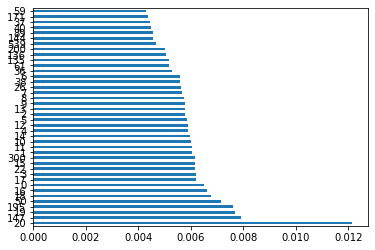

In [ ]:
import matplotlib.pyplot as plt
feat_importance=pd.Series(model.feature_importances_,index=x_tr.columns)
feat_importance.nlargest(40).plot(kind='barh')
plt.show

In [ ]:
# y_tr=np.array(y_tr)
# y_tr=y_tr.ravel()

#scalling data
---
making standard devation near to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_tr = StandardScaler()
scaler_te = StandardScaler()
x_tr1 = scaler_tr.fit_transform(x_tr)
x_te1 =scaler_te.fit_transform(x_te)

In [ ]:
np.mean(x_tr1,axis=0)

array([ 1.91339714e-14, -2.85388785e-15,  1.34548300e-14, -1.78956714e-15,
       -2.99802463e-16,  1.13405776e-14, -1.01756123e-14,  1.62468170e-14,
        1.19308440e-14,  3.86319380e-15, -1.50952754e-14,  1.09032139e-14,
        1.59423210e-14, -1.55166785e-14, -9.95096953e-15, -5.95072993e-15,
       -1.72696448e-14,  2.08672258e-14, -6.77976616e-15,  2.11817372e-14,
       -6.88925494e-18, -4.11192115e-14,  1.93836554e-14, -4.35453698e-14,
        8.06207376e-15, -2.36592181e-14, -2.28950484e-14, -3.65797997e-15,
        6.51601215e-16,  1.55470090e-14,  1.06271146e-14, -1.76764362e-15,
       -1.21352921e-14,  1.98434939e-14,  1.41743690e-14,  6.60018716e-15,
       -3.86155825e-14,  1.46425933e-14, -2.08995027e-14,  1.88942036e-14,
       -3.63056807e-14,  4.17333606e-14, -4.72863757e-14,  6.47380635e-15,
       -1.95573665e-14, -2.97195424e-14, -1.10688560e-14, -5.73536335e-15,
       -8.48355506e-15, -3.15969167e-14,  1.83754141e-14, -1.06833038e-15,
        5.14311872e-15,  

In [ ]:
np.std(x_tr1,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
np.mean(x_te1,axis=0)

array([ 6.61450658e-15, -2.61125600e-15, -3.09700719e-15,  1.42171021e-15,
       -1.82782388e-15,  1.80859051e-15,  3.92512006e-15, -1.22648646e-15,
        4.34710496e-15,  4.63483299e-15, -2.32204004e-15, -1.23097075e-14,
        3.99678858e-15, -5.12820504e-15, -1.85810226e-15,  5.82509413e-16,
        1.73540544e-15,  1.77582128e-14,  4.93586653e-16,  5.99609614e-15,
       -2.92983469e-15, -1.67706294e-14,  1.24552001e-14,  5.96836441e-15,
        1.24683244e-14, -5.07049538e-15,  1.64883332e-14, -6.97214337e-15,
        2.85636825e-16, -6.35804410e-15,  6.66240760e-15,  1.18779247e-14,
       -2.99815060e-15,  8.38500947e-15, -2.11736413e-15, -4.46715021e-15,
       -1.12559876e-14,  8.93074751e-15,  1.48535775e-14, -6.12844302e-15,
        6.13330978e-15, -6.62825322e-15, -1.03130324e-14, -8.68057535e-15,
       -3.12728318e-15,  5.44539595e-15, -6.94476931e-15, -4.77084246e-15,
       -1.77234945e-14,  8.91911592e-15, -1.80362455e-14,  5.82839428e-15,
        6.57887738e-15,  

In [ ]:
np.std(x_te1,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

#pca (Principal component analysis)
---


In [ ]:
from sklearn.decomposition import PCA
def pca_fun(n):
    pca = PCA(n)
    pca.fit(x_tr1)
    x_tr_trf= pca.transform(x_tr1)
    x_te_trf=pca.transform(x_te1)
    return x_tr_trf,x_te_trf

In [ ]:
# shape_list=[]
# for i in np.arange(300, 310):
#    p=pca_fun(i)
#    shape_list.append(p[0].shape[1])

In [ ]:
p=pca_fun(.50)
print(p[0].shape[1])
np.linalg.det(np.cov(p[0],rowvar=0))

137


2.2395334622535452e+16

In [ ]:
'''
  at n=.20
    6
    131504.18283953864

  at n=.30
    40
    546521476195.33984

  at n=.40
    40
    546521476195.33984

  at n=.47
    121
    1.6762520137738122e+16

  at n=.48
    127
    1.9787467469247144e+16

  at n=.49
    132
    2.1495197352532916e+16

  at n=.50    (max)
    137
    2.2395334622535452e+16
  at n=.51
    143
    2.2245257803109376e+16
  at n=.52
    148
    2.1019085103195816e+16
  at n=.55
    165
    1.2284371955397866e+16

  at n=.60
    194
    1592697361795778.8

  at n=.70
    257
    164353911395.7212

  at n=.80
    328
    2176.890225165078

 * at n=.82
    343
    15.970988278809484

 * at n=.83
    351
    0.9732321403438391

  at n=.84
    358
    0.07621146810638234

  at n=.85
    366
    0.0036946545572524225

  at n=.90
    408
    5.0219642775034735e-11

  at n=.91
    436
    2.2793023004154796e-17
'''

'\n  at n=.20\n    6\n    131504.18283953864\n\n  at n=.30\n    40\n    546521476195.33984\n  \n  at n=.40\n    40\n    546521476195.33984\n  \n  at n=.47\n    121\n    1.6762520137738122e+16\n\n  at n=.48\n    127\n    1.9787467469247144e+16\n\n  at n=.49\n    132\n    2.1495197352532916e+16\n  \n  at n=.50    (max)\n    137\n    2.2395334622535452e+16\n  at n=.51\n    143\n    2.2245257803109376e+16\n  at n=.52\n    148\n    2.1019085103195816e+16\n  at n=.55\n    165\n    1.2284371955397866e+16\n\n  at n=.60\n    194\n    1592697361795778.8\n\n  at n=.70\n    257\n    164353911395.7212\n  \n  at n=.80\n    328\n    2176.890225165078\n  \n * at n=.82\n    343\n    15.970988278809484\n  \n * at n=.83\n    351\n    0.9732321403438391\n  \n  at n=.84\n    358\n    0.07621146810638234\n\n  at n=.85\n    366\n    0.0036946545572524225\n  \n  at n=.90\n    408\n    5.0219642775034735e-11\n\n  at n=.91\n    436\n    2.2793023004154796e-17\n'

In [ ]:
# shape_list=[]
# lin=[]
# for i in [.81,.82,.83,.84,.85,.86,.87,.88,.89]:
#   p=pca_fun(i)
#   shape_list.append(p[0].shape[1])
#   lin.append(np.linalg.det(np.cov(p[0],rowvar=0)))


In [ ]:
# lin

In [ ]:
# np.linalg.det(np.cov(p,rowvar=0))

In [ ]:
# shape_list

#**SMOTE**(Synthetic Minority Oversampling Technique)

In [ ]:
from collections import Counter

a=Counter(y_tr[0])
a

Counter({0: 49655, 1: 2905})

In [ ]:
! pip install imblearn
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sm = SMOTE(random_state = 2)
x_tr_res, y_tr_res = sm.fit_resample(p[0], y_tr)

print('After OverSampling, the shape of train_X: {}'.format(x_tr_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_tr_res.shape))


After OverSampling, the shape of train_X: (99310, 137)
After OverSampling, the shape of train_y: (99310, 1) 



In [ ]:
from collections import Counter

b=Counter(y_tr_res[0])
b

Counter({0: 49655, 1: 49655})

#APPLYING ALGOS

---

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

# 1) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_tr_res,y_tr_res)
#gnb.fit(p[0],y_tr)
y_pred=gnb.predict(p[1])



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(y_pred,y_te)

0.7983247422680413

In [ ]:
print(classification_report(y_pred,y_te))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18989
           1       0.41      0.22      0.29      4291

    accuracy                           0.80     23280
   macro avg       0.63      0.57      0.58     23280
weighted avg       0.76      0.80      0.77     23280



#2) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_tr_res,y_tr_res)
#lr.fit(p[0],y_tr)
y_pred=lr.predict(p[1])
print(classification_report(y_pred,y_te))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.94      0.90     19048
           1       0.51      0.28      0.36      4232

    accuracy                           0.82     23280
   macro avg       0.68      0.61      0.63     23280
weighted avg       0.79      0.82      0.80     23280



# 3) k nearest neighbour


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_tr_res,y_tr_res)
#knn.fit(p[0],y_tr)
y_pred = knn.predict(p[1])

accuracy_score(y_pred,y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7490979381443299

In [ ]:
print(classification_report(y_pred,y_te))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     17413
           1       0.51      0.20      0.28      5867

    accuracy                           0.75     23280
   macro avg       0.64      0.57      0.57     23280
weighted avg       0.71      0.75      0.71     23280



# 4) Dicision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_tr_res,y_tr_res)
#dt.fit(p[0],y_tr)
y_pred = dt.predict(p[1])


In [ ]:
accuracy_score(y_pred,y_te)

0.7869845360824742

In [ ]:
print(classification_report(y_pred,y_te))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88     19007
           1       0.35      0.19      0.24      4273

    accuracy                           0.79     23280
   macro avg       0.59      0.55      0.56     23280
weighted avg       0.75      0.79      0.76     23280



# 5) Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(x_tr_res,y_tr_res)
# # svm.fit(p[0],y_tr)
# y_pred = svm.predict(p[1])

In [ ]:
# accuracy_score(y_pred,y_te)

In [ ]:
# print(classification_report(y_pred,y_te))

# 6) Random Forest Classifier

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_tr_res, y_tr_res)
#Predicting the test set result
y_pred= classifier.predict(p[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print(classification_report(y_pred,y_te))

#waste


In [ ]:
p.singular_values_

In [ ]:
np.linalg.det(np.cov(x_tr_trf,rowvar=0))

In [ ]:
x_cov=x_tr.corr()
x_cov

In [ ]:

# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(30,30))
#     sns.heatmap(data=x_tr.corr(),vmin=0,vmax=1,square=True,annot=True)

In [ ]:
# corrmat = x_tr.corr()
# top_corr_feature=corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(x_tr[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [ ]:
df1 = x_tr
df1['y'] = y_tr

In [ ]:
df1

In [ ]:
df=df1.corr()